# Selenium 기초

In [3]:
from selenium import webdriver
 
browser = webdriver.Chrome("./chromedriver.exe") #chrome driver 경로
browser.get("http://naver.com")

In [5]:
# 네이버 로그인 버튼 클릭
elem = browser.find_element_by_class_name("link_login")
elem.click()

In [6]:
# 뒤로가기
browser.back()

In [7]:
# 새로고침
browser.refresh()

In [9]:
from selenium.webdriver.common.keys import Keys

# 검색
elem = browser.find_element_by_id("query")
elem.send_keys("메이플스토리") # 검색 입력
elem.send_keys(Keys.ENTER)

In [10]:
elem = browser.find_elements_by_tag_name("a")
elem

[<selenium.webdriver.remote.webelement.WebElement (session="dfc71167a0df463b8c9b89c011189070", element="dc6bdeb1-9e5c-438d-831d-43e2314bf905")>,
 <selenium.webdriver.remote.webelement.WebElement (session="dfc71167a0df463b8c9b89c011189070", element="28da3547-c2e8-47a8-a416-dd2e4c709243")>,
 <selenium.webdriver.remote.webelement.WebElement (session="dfc71167a0df463b8c9b89c011189070", element="deda2b67-534d-483e-aee3-2c7c514f55d1")>,
 <selenium.webdriver.remote.webelement.WebElement (session="dfc71167a0df463b8c9b89c011189070", element="d3ea2e19-acbf-4df2-b142-d2b87c1476b0")>,
 <selenium.webdriver.remote.webelement.WebElement (session="dfc71167a0df463b8c9b89c011189070", element="3fd1d87b-cc7c-4193-927c-d7c3cca80543")>,
 <selenium.webdriver.remote.webelement.WebElement (session="dfc71167a0df463b8c9b89c011189070", element="9e851b02-ebcf-4a0d-8cbd-bf9c37583e9e")>,
 <selenium.webdriver.remote.webelement.WebElement (session="dfc71167a0df463b8c9b89c011189070", element="f4207359-406e-4965-8d5d-16

In [12]:
for e in elem:
    e.get_attribute("href")

In [17]:
# daum 으로 이동
browser.get("http://daum.net")

In [14]:
# ENTER
elem = browser.find_element_by_name("q")
elem.send_keys("페이커")
elem.send_keys(Keys.ENTER)

In [18]:
# 검색버튼 클릭
elem = browser.find_element_by_name("q")
elem.send_keys("페이커")
elem = browser.find_element_by_xpath("//*[@id='daumSearch']/fieldset/div/div/button[2]")
elem.click()

In [19]:
# 모든 브라우저 종료
browser.quit()

# 네이버 자동 로그인

In [40]:
from selenium import webdriver
import time

browser = webdriver.Chrome()

# 1. 네이버 이동
browser.get("http://naver.com")

In [41]:
# 2. 로그인 버튼 클릭
elem = browser.find_element_by_class_name("link_login")
elem.click()

In [42]:
# id, pw 입력
browser.find_element_by_id("id").send_keys("naver_id")
browser.find_element_by_id("pw").send_keys("password")

In [43]:
# 로그인 버튼 클릭
browser.find_element_by_id("log.login").click()

In [44]:
# 5. 로그인 정보가 틀렸을 때 id를 새로 입력
time.sleep(3)

browser.find_element_by_id("id").clear() # 앞에 쓴 것 제거
browser.find_element_by_id("id").send_keys("my_id")

<html lang="ko"><head>
    <meta charset="UTF-8">
    <meta http-equiv="X-UA-Compatible" content="IE=edge, chrome=1">
    <meta name="viewport" content="width=device-width, initial-scale=1.0, maximum-scale=1.0, user-scalable=no">
    <meta property="og:type" content="website">
    <meta property="og:title" content="[네이버: 로그인]">
    <meta property="og:description" content="안전한 로그인을 위해 주소창의 URL과 자물쇠 마크를 확인하세요!">
    <meta property="og:image" content="https://ssl.pstatic.net/sstatic/search/common/og_v3.png">
    <meta property="og:image:type" content="image/png">
    <meta property="og:image:width" content="1200">
    <meta property="og:image:height" content="1200">
    <title>네이버 : 로그인</title>
    <link rel="stylesheet" type="text/css" href="/login/css/global/desktop/w_202105.css?20210812">
<link id="rcapt_css" rel="stylesheet" type="text/css" href="https://rcaptcha.nid.naver.com/rcaptCss?key=3pUkNxjFxiyAO6" media="all"></head>
<body>
<div id="wrap" class="wrap">
    <div class="u_skip">
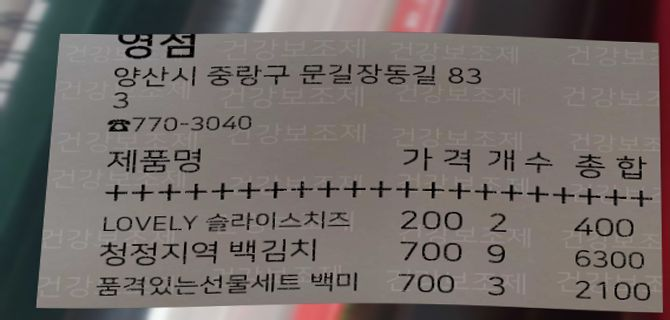

In [45]:
# html 정보 출력
print(browser.page_source)

In [46]:
# 브라우저 종료
#browser.close() # 현재 탭만 종료
browser.quit() # 전체 종료

# 구글 무비

할인하는 영화만 스크래핑

In [55]:
import requests
from bs4 import BeautifulSoup

headers = {"User-Agent":"Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/93.0.4577.63 Safari/537.36",
          "Accept-Language":"ko-KR,ko"}
url = "https://play.google.com/store/movies/top"

res = requests.get(url, headers=headers)
res.raise_for_status()
soup = BeautifulSoup(res.text, 'lxml')

In [56]:
movies = soup.find_all("div", attrs={"class":"ImZGtf mpg5gc"})
print(len(movies))

10


In [57]:
#with open("movie.html", "w", encoding="utf8") as f:
    #f.write(soup.prettify()) # html문서 예쁘게 출력

In [58]:
for movie in movies:
    title = movie.find("div", attrs={"class":"WsMG1c nnK0zc"}).get_text()
    print(title)

분노의 질주: 더 얼티메이트
더 수어사이드 스쿼드
블랙 위도우
킬러의 보디가드 2: 킬러의 와이프
콰이어트 플레이스 2
Cruella
루카
베놈   Venom
어벤져스 : 엔드게임 (자막판)
스파이더맨: 파 프롬 홈 (자막판)


### 동적 페이지여서 selenium을 통해 가져오기

In [75]:
from selenium import webdriver
browser = webdriver.Chrome()
browser.maximize_window()

# 페이지 이동
url = "https://play.google.com/store/movies/top"
browser.get(url)

In [64]:
# 스크롤 내리기
# 해상도 높이 1080 위치로 스크롤 내리기
browser.execute_script("window.scrollTo(0, 2080)") 

In [65]:
# 화면 가장 아래로 스크롤 내리기
browser.execute_script("window.scrollTo(0, document.body.scrollHeight)")

In [76]:
import time
interval = 2 # 2초에 한번씩 스크롤 다운

# 현재 문서 높이 가져와서 저장
prev_height = browser.execute_script("return document.body.scrollHeight")

# 반복수행
while True:
    # 스크롤을 가장 아래로 내림
    browser.execute_script("window.scrollTo(0, document.body.scrollHeight)")
    
    # 페이지 로딩 대기
    time.sleep(interval)
    
    # 현재 문서 높이를 가져와서 저장
    curr_height = browser.execute_script("return document.body.scrollHeight")
    if curr_height == prev_height:
        break
    
    prev_height = curr_height
print("스크롤 완료")

스크롤 완료


In [77]:
import requests
from bs4 import BeautifulSoup

soup = BeautifulSoup(browser.page_source, "lxml")

#movies = soup.find_all("div", attrs={"class":["ImZGtf mpg5gc","Vpfmgd"]}) # 리스트를 활용해 두 가지 모두 만족시키는 것 가져오기 가능
movies = soup.find_all("div", attrs={"class":"Vpfmgd"})
print(len(movies))

for movie in movies:
    title = movie.find("div", attrs={"class":"WsMG1c nnK0zc"}).get_text()
    
    # 할인 전 가격
    original_price = movie.find("span", attrs={"class":"SUZt4c djCuy"})
    if original_price:
        original_price = original_price.get_text()
    else:
        #print(title, "할인되지 않은 영화 제외")
        continue
        
    # 할인된 가격
    price = movie.find("span", attrs={"class":"VfPpfd ZdBevf i5DZme"}).get_text()
    # 링크
    link = movie.find("a", attrs={"class":"JC71ub"})["href"]
    # 올바른 링크 : https://play.google.com + link
    
    print(f"제목 : {title}")
    print(f"할인 전 금액 : {original_price}")
    print(f"할인 후 금액: {price}" )
    print("링크 :", "https://play.google.com" + link)
    print("-"*50)
    
browser.quit()

200
제목 : 콰이어트 플레이스 2
할인 전 금액 : ₩10,000
할인 후 금액: ₩5,000
링크 : https://play.google.com/store/movies/details/%EC%BD%B0%EC%9D%B4%EC%96%B4%ED%8A%B8_%ED%94%8C%EB%A0%88%EC%9D%B4%EC%8A%A4_2?id=aDcBkk_fwLQ.P
--------------------------------------------------
제목 : 고질라 VS. 콩
할인 전 금액 : ₩5,000
할인 후 금액: ₩2,500
링크 : https://play.google.com/store/movies/details/%EA%B3%A0%EC%A7%88%EB%9D%BC_VS_%EC%BD%A9?id=bKfIMqA5r6Q.P
--------------------------------------------------
제목 : 스페이스 잼: 새로운 시대
할인 전 금액 : ₩14,900
할인 후 금액: ₩9,900
링크 : https://play.google.com/store/movies/details/%EC%8A%A4%ED%8E%98%EC%9D%B4%EC%8A%A4_%EC%9E%BC_%EC%83%88%EB%A1%9C%EC%9A%B4_%EC%8B%9C%EB%8C%80?id=Rjj97EQD0xU.P
--------------------------------------------------
제목 : 라야와 마지막 드래곤
할인 전 금액 : ₩10,900
할인 후 금액: ₩7,150
링크 : https://play.google.com/store/movies/details/%EB%9D%BC%EC%95%BC%EC%99%80_%EB%A7%88%EC%A7%80%EB%A7%89_%EB%93%9C%EB%9E%98%EA%B3%A4?id=mOj6B2R2qfo.P
--------------------------------------------------
제목 : 아바타
할인 전 금액 : ₩5,500

# Headless Chrome

In [79]:
from selenium import webdriver

# chrome 창을 띄우지 않음
options = webdriver.ChromeOptions()
options.headless = True
options.add_argument("window-size=1920x1080")

browser = webdriver.Chrome(options=options)
browser.maximize_window()

# 페이지 이동
url = "https://play.google.com/store/movies/top"
browser.get(url)



import time
interval = 2 # 2초에 한번씩 스크롤 다운

# 현재 문서 높이 가져와서 저장
prev_height = browser.execute_script("return document.body.scrollHeight")

# 반복수행
while True:
    # 스크롤을 가장 아래로 내림
    browser.execute_script("window.scrollTo(0, document.body.scrollHeight)")
    
    # 페이지 로딩 대기
    time.sleep(interval)
    
    # 현재 문서 높이를 가져와서 저장
    curr_height = browser.execute_script("return document.body.scrollHeight")
    if curr_height == prev_height:
        break
    
    prev_height = curr_height
print("스크롤 완료")
browser.get_screenshot_as_file("google_movie.png") # 스크롤완료된 페이지를 스크린샷


import requests
from bs4 import BeautifulSoup

soup = BeautifulSoup(browser.page_source, "lxml")

#movies = soup.find_all("div", attrs={"class":["ImZGtf mpg5gc","Vpfmgd"]}) # 리스트를 활용해 두 가지 모두 만족시키는 것 가져오기 가능
movies = soup.find_all("div", attrs={"class":"Vpfmgd"})
print(len(movies))

for movie in movies:
    title = movie.find("div", attrs={"class":"WsMG1c nnK0zc"}).get_text()
    
    # 할인 전 가격
    original_price = movie.find("span", attrs={"class":"SUZt4c djCuy"})
    if original_price:
        original_price = original_price.get_text()
    else:
        #print(title, "할인되지 않은 영화 제외")
        continue
        
    # 할인된 가격
    price = movie.find("span", attrs={"class":"VfPpfd ZdBevf i5DZme"}).get_text()
    # 링크
    link = movie.find("a", attrs={"class":"JC71ub"})["href"]
    # 올바른 링크 : https://play.google.com + link
    
    print(f"제목 : {title}")
    print(f"할인 전 금액 : {original_price}")
    print(f"할인 후 금액: {price}" )
    print("링크 :", "https://play.google.com" + link)
    print("-"*50)
    
browser.quit()

스크롤 완료
200
제목 : 콰이어트 플레이스 2
할인 전 금액 : ₩10,000
할인 후 금액: ₩5,000
링크 : https://play.google.com/store/movies/details/%EC%BD%B0%EC%9D%B4%EC%96%B4%ED%8A%B8_%ED%94%8C%EB%A0%88%EC%9D%B4%EC%8A%A4_2?id=aDcBkk_fwLQ.P
--------------------------------------------------
제목 : 고질라 VS. 콩
할인 전 금액 : ₩5,000
할인 후 금액: ₩2,500
링크 : https://play.google.com/store/movies/details/%EA%B3%A0%EC%A7%88%EB%9D%BC_VS_%EC%BD%A9?id=bKfIMqA5r6Q.P
--------------------------------------------------
제목 : 스페이스 잼: 새로운 시대
할인 전 금액 : ₩14,900
할인 후 금액: ₩9,900
링크 : https://play.google.com/store/movies/details/%EC%8A%A4%ED%8E%98%EC%9D%B4%EC%8A%A4_%EC%9E%BC_%EC%83%88%EB%A1%9C%EC%9A%B4_%EC%8B%9C%EB%8C%80?id=Rjj97EQD0xU.P
--------------------------------------------------
제목 : 라야와 마지막 드래곤
할인 전 금액 : ₩10,900
할인 후 금액: ₩7,150
링크 : https://play.google.com/store/movies/details/%EB%9D%BC%EC%95%BC%EC%99%80_%EB%A7%88%EC%A7%80%EB%A7%89_%EB%93%9C%EB%9E%98%EA%B3%A4?id=mOj6B2R2qfo.P
--------------------------------------------------
제목 : 아바타
할인 전 금액 :

#### chrome-headless 일 때, user-agent 설정

In [83]:
from selenium import webdriver

# chrome 창을 띄우지 않음
options = webdriver.ChromeOptions()
options.headless = True
options.add_argument("window-size=1920x1080")
options.add_argument("user-agent=Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/93.0.4577.63 Safari/537.36")

browser = webdriver.Chrome(options=options)
browser.maximize_window()

url = "https://www.whatismybrowser.com/detect/what-is-my-user-agent"
browser.get(url)
detected_value = browser.find_element_by_id("detected_value")
print(detected_value.text)

browser.quit()

Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/93.0.4577.63 Safari/537.36
